# BASEBALL MONEYBALL DATA SET 

First thing which would be interesting to do is to identify our so called "top" teams.
We can generally assume that "top" teams will be those who has high results in such parameters as:
* OBP or On-Base % or On-Base Percentage
* SLG or Slugging % or Slugging Percentage
* RS or Runs Scored
* RA or Runs Allowed
* W or Wins
* BA or Batting Average
* OOBP or Opponent On-Base Percentage
* OSLG or Opponent Slugging Percentage

We can split those stats to 3 groups:
* Group 1. Offensive stats: OBP, SLG, BA
* Group 2. Defensive stats: OOBP, OSLG
* Group 3: "Dependent" stats: RS, RA, W

This is my division and maybe it is not correct. But let me try to explain my approach.

If a team has high OBP or On-Base % it means that the team is good in taking bases. The more often a team takes bases the more chances it has to score runs RS. The more runs RS a team scores the more chances it has to win W a game. The more games a team wins during the season the more chances it has to get to Playoffs. And playoffs is basically what every team wants to achieve.
So you can see that RS (Runs Scored) and W (Wins) are in general - consequences of high OBP. The same can be said about SLG (Slugging %) and BA (Batting Average).

Defensive stats imply the same logic. The less OOBP a team has the less often an opponent takes bases, the less runs opponent scores and the less games it wins etc = more games you win!

That's why it would be interesting to explore the data from those 3 perspectives: Offense, Defense and Outcome of those two.

NB: notice, I am talking about chances above because in baseball noone can guarantee you anything. You can be trailing 9:1 in 5th inning and then win a game 14:11 like Yankees did in the game vs Orioles this season. So no guarantees, but your chances are higher if your performance is high. That's one of the reasons I love baseball!

### DATA CLEANING

Before beginning the analysis, we should first check whether the data has any duplicate values or might conntain null values because of which will affect the data analysis.
If exist, we should remove these redundancies and make the data clean.

In [2]:
#Add Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read CSV
df=pd.read_csv('baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
#check wheter there are any null values present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
#Remove null values
df3=df.drop(['RankSeason','RankPlayoffs'],axis=1)
df4=df3.dropna()

In [6]:
#Cheack whether there are any duplicate rows present in the dataset
df4.duplicated()
money=df4.drop_duplicates()

In [7]:
#Check the null values after removing duplicates and null values
money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 13 columns):
Team        420 non-null object
League      420 non-null object
Year        420 non-null int64
RS          420 non-null int64
RA          420 non-null int64
W           420 non-null int64
OBP         420 non-null float64
SLG         420 non-null float64
BA          420 non-null float64
Playoffs    420 non-null int64
G           420 non-null int64
OOBP        420 non-null float64
OSLG        420 non-null float64
dtypes: float64(5), int64(6), object(2)
memory usage: 45.9+ KB


In [8]:
money.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

Since all the columns contain same number of rows we can infer that the data is hence cleaned and ready for data analysis. 

##### Exploritory Data Analysis 

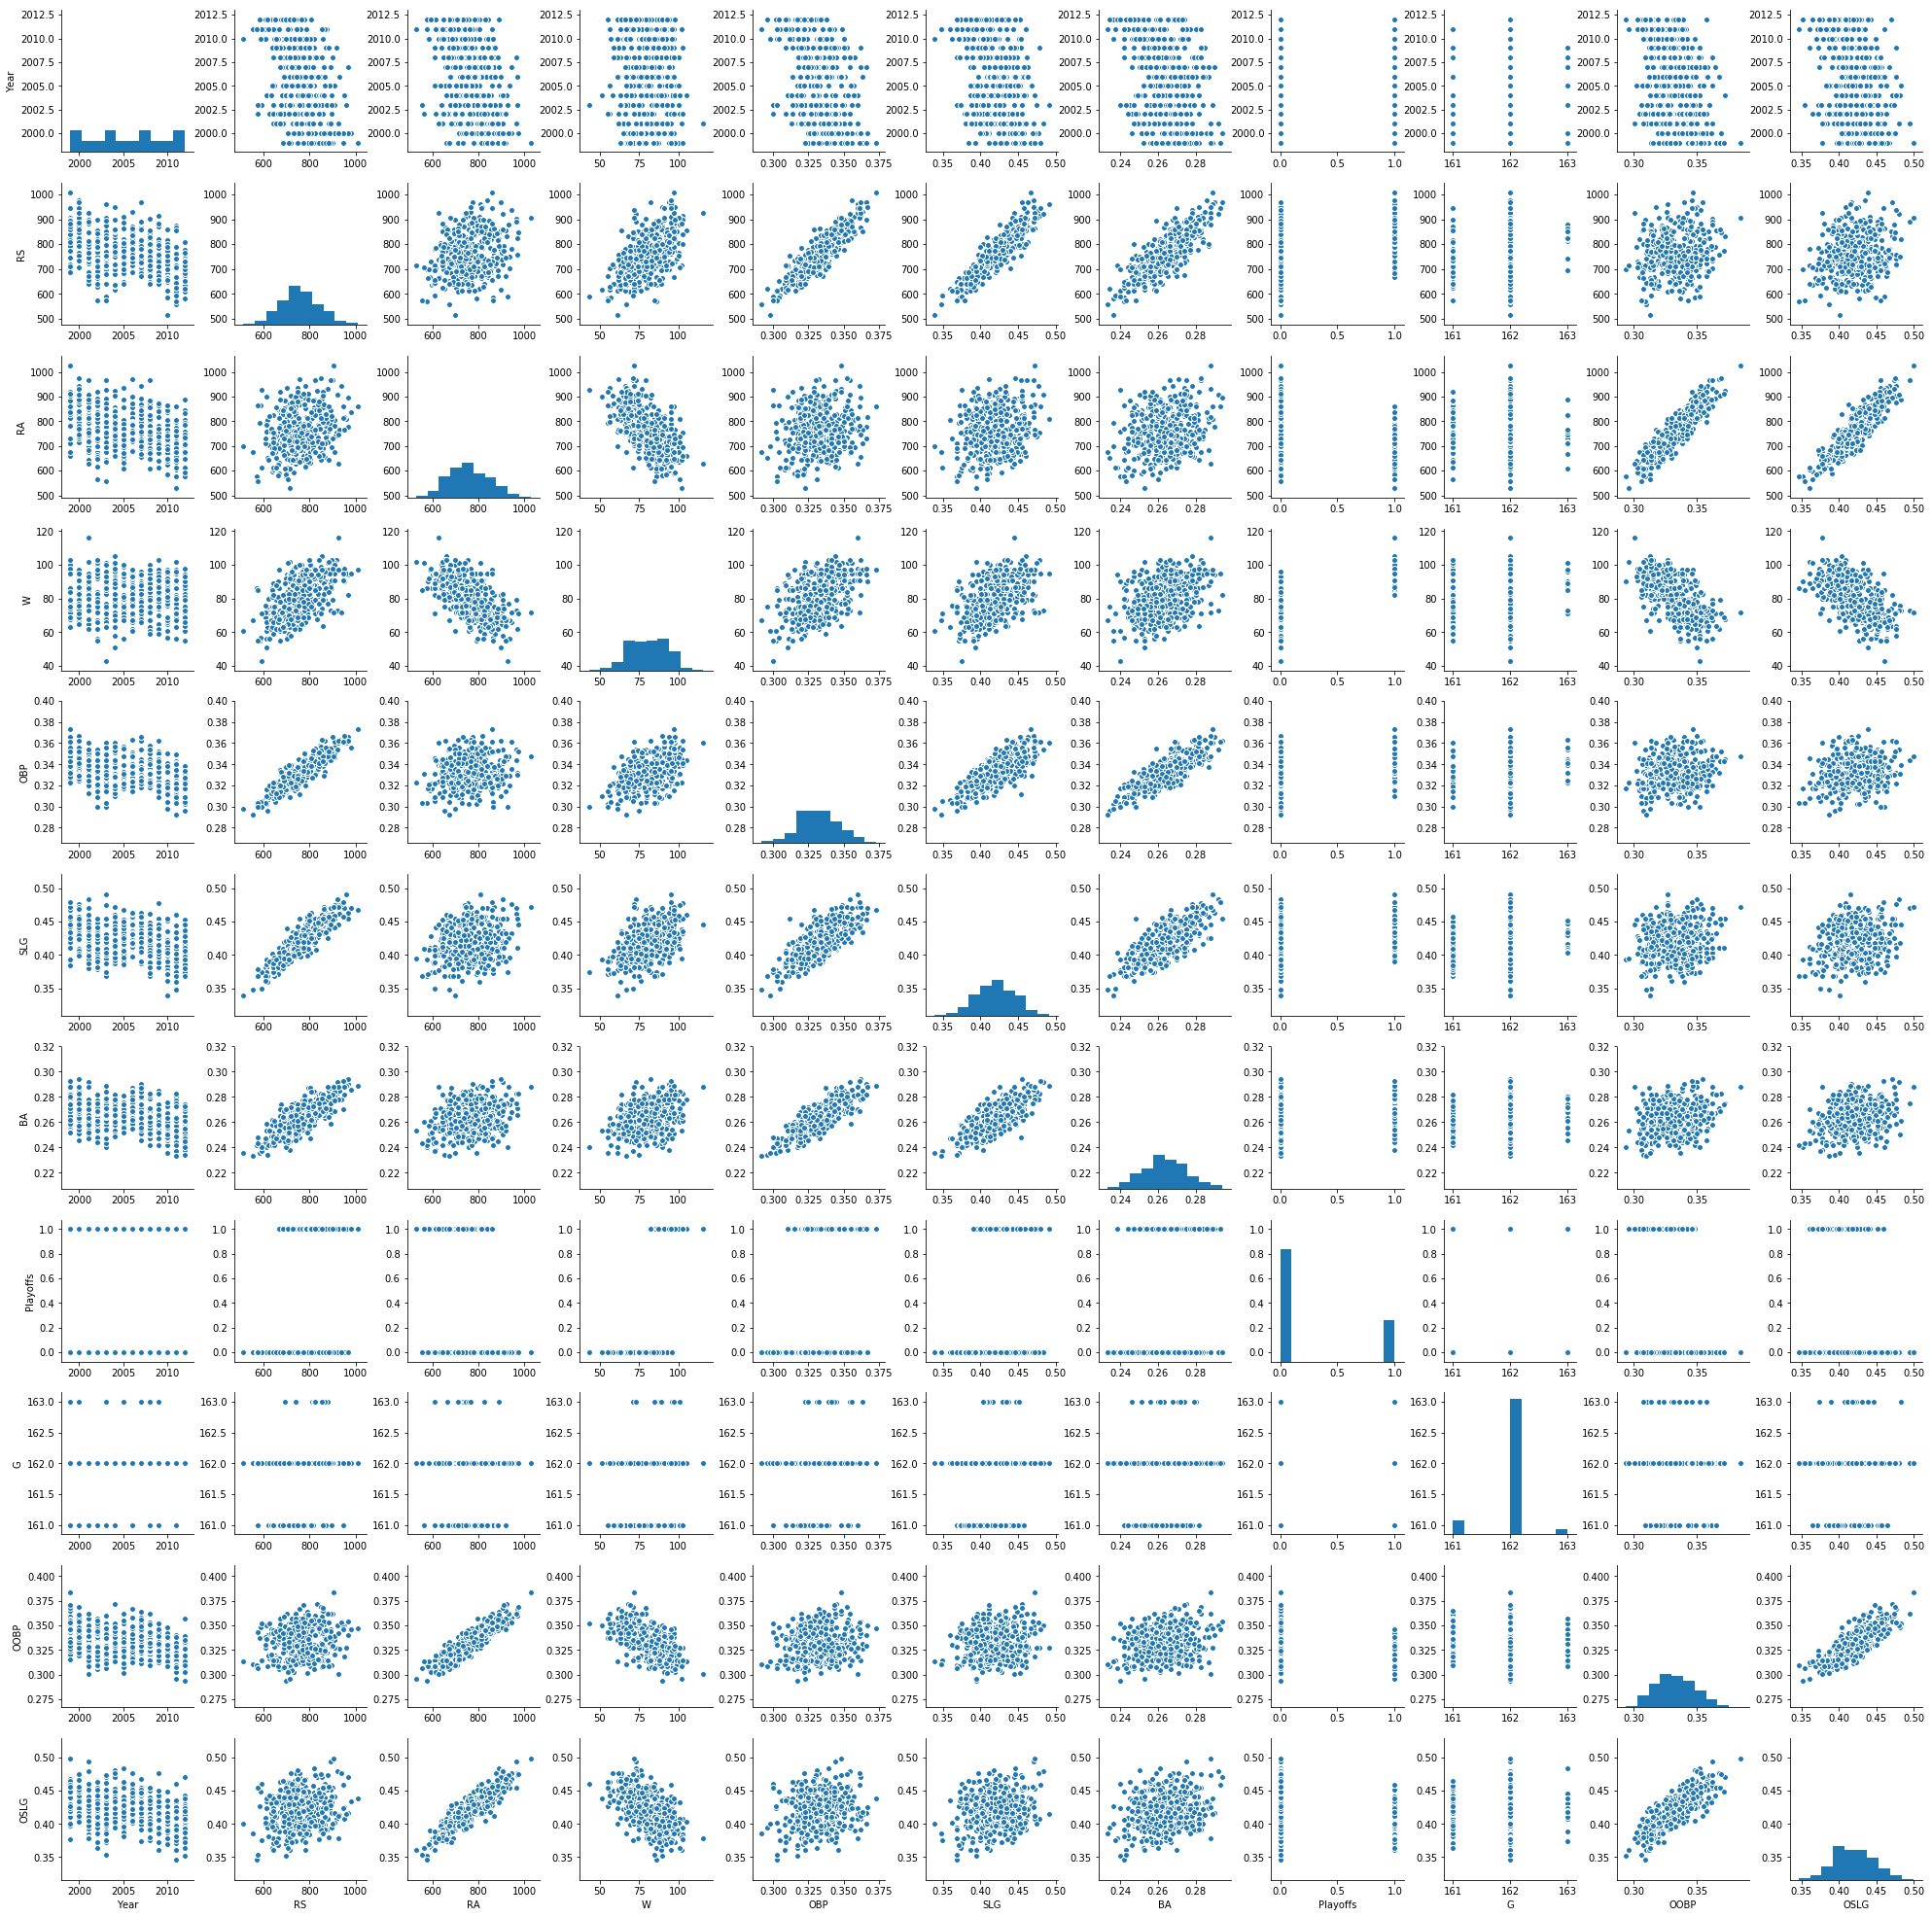

In [9]:
sns.pairplot(money)

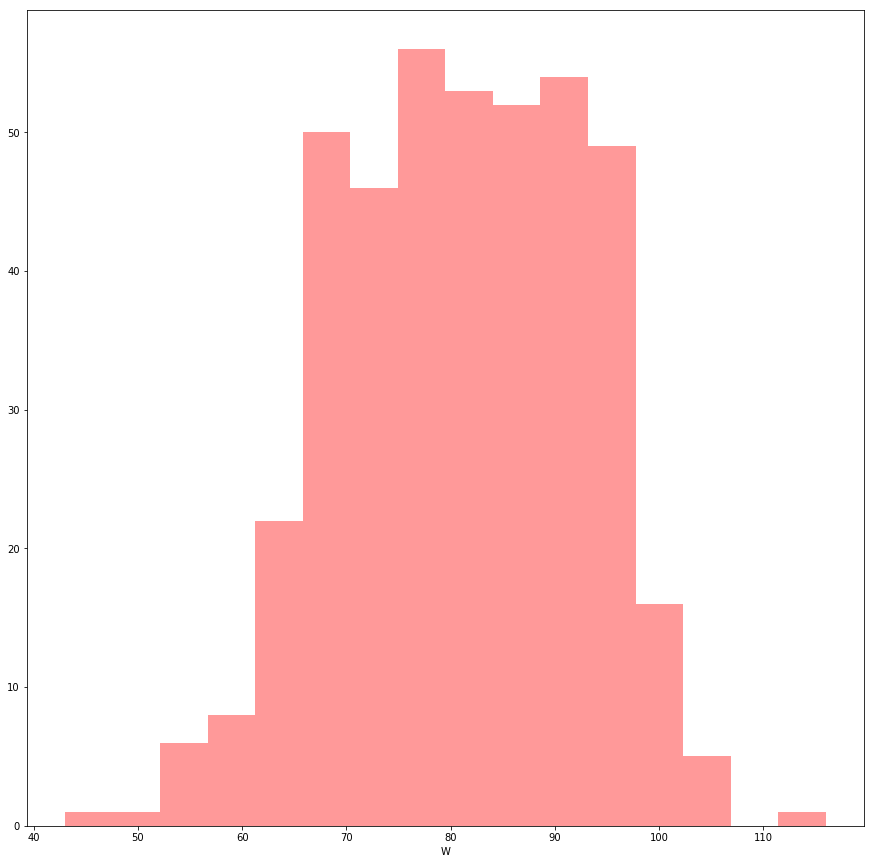

In [218]:
sns.distplot(money['W'],kde=False,color='r')

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5]), <a list of 11 Text yticklabel objects>)

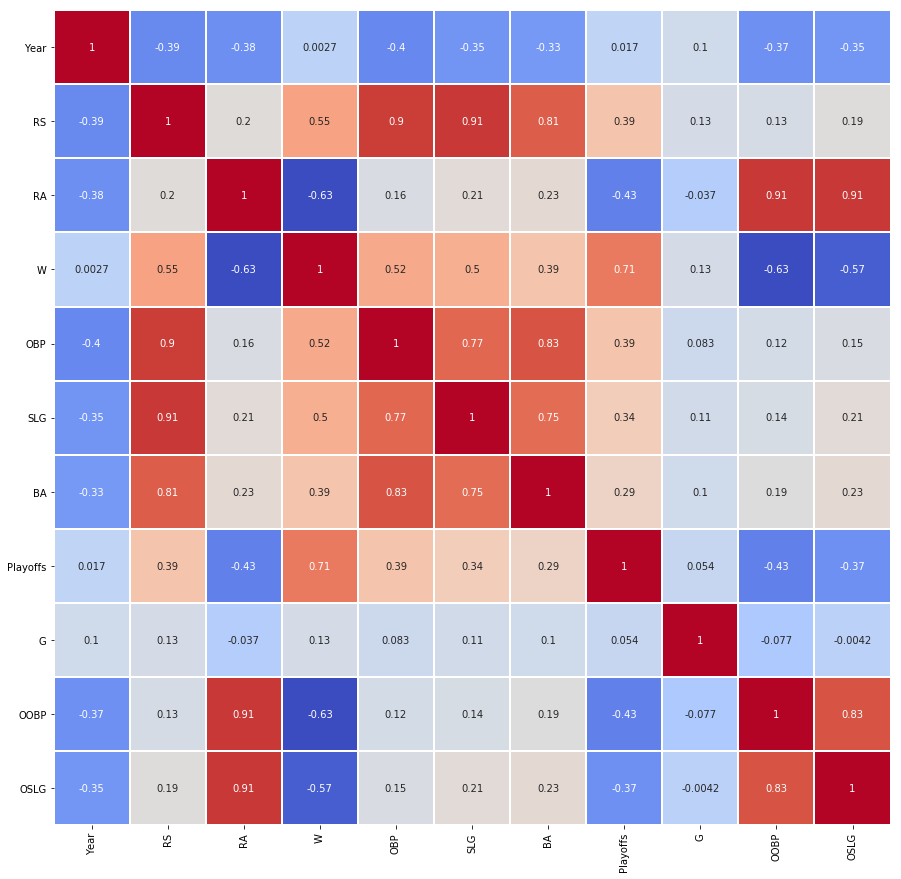

In [98]:
sns.heatmap(money.corr(),annot=True,cmap='coolwarm',linewidth=1,cbar=False)
plt.rcParams['figure.figsize']=(15,15)
plt.xticks(rotation=90)
plt.yticks(rotation=360)

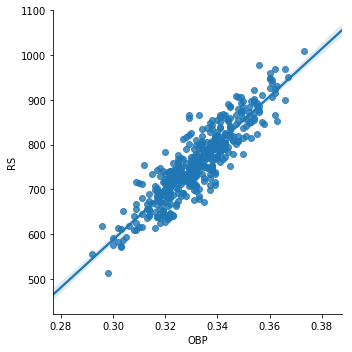

In [11]:
sns.lmplot('OBP','RS',data=money)

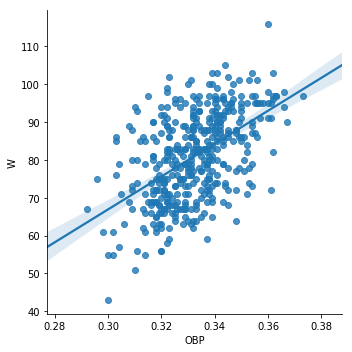

In [12]:
sns.lmplot('OBP','W',data=money)

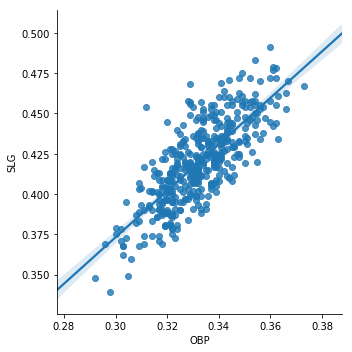

In [13]:
sns.lmplot('OBP','SLG',data=money)

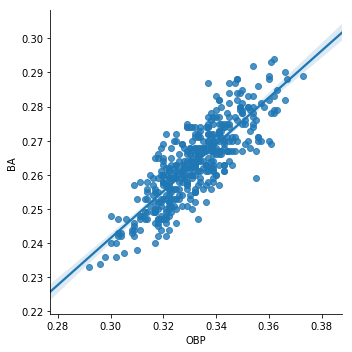

In [14]:
sns.lmplot('OBP','BA',data=money)

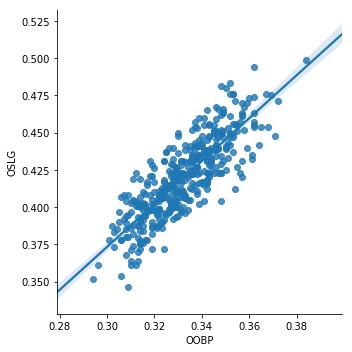

In [15]:
sns.lmplot('OOBP','OSLG',data=money)

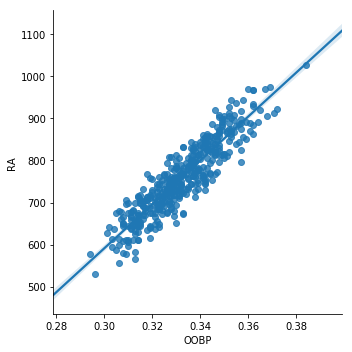

In [16]:
sns.lmplot('OOBP','RA',data=money)

### LINEAR REGRESION 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn import metrics

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### x and y arrays 

In [72]:
x=money[['RS','SLG','BA','W']]
y=money['OBP']

In [73]:
linreg=LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
y_pred=linreg.predict(x)

In [75]:
rmse=np.sqrt(metrics.mean_squared_error(y,y_pred))
rmse

0.0053994874098877745

In [76]:
y_mean=np.mean(y)
rmse/y_mean,y_mean


(0.016248833613866344, 0.3322999999999993)

#### VALIDATION 

#### Test Train Split Variables

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Create and Train Model

In [78]:
lm= LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Model Evaluation 

In [79]:
print(lm.intercept_)

0.177367636863


In [80]:
co_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
co_df

,Coefficient
RS,0.000139
SLG,-0.125248
BA,0.372923
W,0.000043


In [81]:
model1=linear_model.LinearRegression()
result=model1.fit(x,y)
print(result.intercept_,result.coef_)

0.175363327044 [  1.42146063e-04  -1.49396840e-01   4.01072726e-01   7.33646923e-05]


#### Prediction from our Model

In [82]:
prediction=lm.predict(x_test)
prediction

array([ 0.34851043,  0.32918897,  0.31235677,  0.31698563,  0.32718373,
        0.33289857,  0.30226605,  0.33776114,  0.32659717,  0.31417444,
        0.34575367,  0.33370437,  0.33620155,  0.32046045,  0.33525501,
        0.32999493,  0.31787723,  0.32394032,  0.36281373,  0.32473363,
        0.33570233,  0.32224605,  0.30530532,  0.33296639,  0.34131699,
        0.34904852,  0.32446935,  0.35404127,  0.32166219,  0.32687457,
        0.32514666,  0.30442031,  0.36123507,  0.35231893,  0.32580393,
        0.31447667,  0.33059682,  0.32239711,  0.33476398,  0.35224053,
        0.3097805 ,  0.34347367,  0.33886862,  0.33780426,  0.33984905,
        0.32809334,  0.35038123,  0.34003449,  0.31234122,  0.35039814,
        0.31998256,  0.32651659,  0.32531944,  0.33917781,  0.31923882,
        0.32823857,  0.31661781,  0.32205655,  0.34284483,  0.32132379,
        0.33182019,  0.3046281 ,  0.32033951,  0.33114206,  0.35928241,
        0.32747172,  0.34993111,  0.33544657,  0.32981436,  0.35

In [83]:
print('R-Squared:',metrics.explained_variance_score(y_test,prediction))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
print('Mean Square Root Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

R-Squared: 0.891486422139
Mean Absolute Error: 0.00422566583771
Mean Squared Error: 2.75747221952e-05
Mean Square Root Error: 0.00525116388958


In [84]:
print(np.sqrt(metrics.mean_squared_error(y_test,prediction))/np.mean(y_test))

0.0158235674675


In [85]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OBP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.992e+05
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:58:05   Log-Likelihood:                 1453.6
No. Observations:                 420   AIC:                            -2899.
Df Residuals:                     416   BIC:                            -2883.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RS          1.294e-05    8.8e-06      1.470      0.142   -4.36e-06    3.02e-05
SLG            0.1054      0.030      3.547      0.000       0.047       0.164
BA             1.0042      0.035     28.346      0.000       0.935       1.074
W              0.0002   3.82e-05      4.303      0.000    8.93e-05       0.000
==============================================================================
Omnibus:                        1.436   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                1.418
Skew:                          -0.065   Prob(JB):                        0.492
Kurtosis:                       2.746   Cond. No.                     9.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
linear_reg=pd.DataFrame([])
linear_reg=linear_reg.append(pd.DataFrame({'Y_test':y_test,'Y_pred':prediction}),ignore_index=True)
linear_reg.head()

,Y_pred,Y_test
0,0.348510,0.354
1,0.329189,0.326
2,0.312357,0.304
3,0.316986,0.318
4,0.327184,0.320


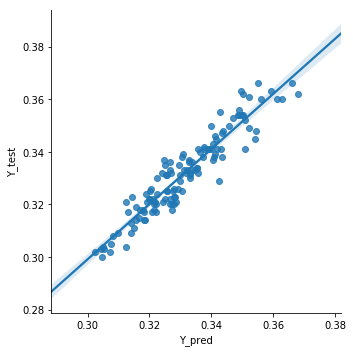

In [87]:
sns.lmplot('Y_pred','Y_test',data=linear_reg)

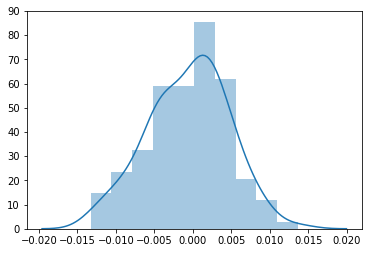

In [88]:
sns.distplot(linear_reg['Y_pred']-linear_reg['Y_test'])

#### KFOLD CROSS VALIDATION

In [89]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=False)


In [90]:
test= list()
from sklearn.linear_model import LinearRegression,Ridge
for train_index, test_index in kf.split(x):
    
    x_train, x_test = x.iloc[train_index],x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("TRAIN", train_index, "TEST", test_index)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(rmse)
    test.append(rmse)

TRAIN [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 

In [91]:
print(test)
kfold_avg=np.mean(test)
kfold_avg

[0.0058174087856790414, 0.0055609555083520074, 0.0057868651019234016, 0.0056885062702234195, 0.0054459223803327607]


0.0056599316093021261

#### RIDGE REGRESSION 

In [92]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
y_pred = ridge.predict(x_test)

Text(0.5,1,'Ridge Regression - OBP vs Predicted OBP: $Y_i$ vs $\\hat{y}_i$')

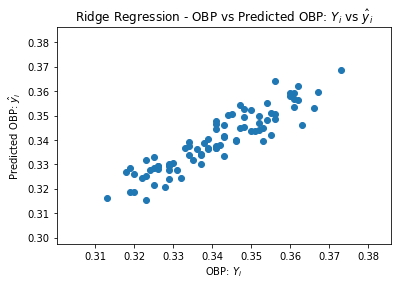

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel("OBP: $Y_i$")
plt.ylabel("Predicted OBP: $\hat{y}_i$")
plt.title("Ridge Regression - OBP vs Predicted OBP: $Y_i$ vs $\hat{y}_i$")

In [95]:
rmse_ridge=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse_ridge

0.0056771995626035635

In [96]:
print("RMSE : LINEAR REGRESSION",rmse)
print("RMSE : KFOLD",kfold_avg)
print("RMSE : RIDGE REGRESSION",rmse_ridge)

RMSE : LINEAR REGRESSION 0.00544592238033
RMSE : KFOLD 0.0056599316093
RMSE : RIDGE REGRESSION 0.0056771995626


Answering the following questions:
* Is the relationship significant? 
  - From the above graphs we can infer that relationship is significant.
* Are any model assumptions violated? 
  - Apart from Multi-collinearity between explanatory/predictor variables, All other assumptions are not violated.
* Is there any multi-colinearity in the model?
  -  Yes, there is a multi-colinearity in the model since one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.
* In the multiple regression models are predictor variables independent of all the other predictor variables?
  - NO,from the heat map plot we can justify that the predictor variables are dependent on other variales.    
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
  - Since 'W' Column has maximum correlation with the target variable, we can say that 'W' is the most significant predictor variable
* Does the model make sense? 
  - Yes, since we can predict the target variables from the predictor variables the model makes sense
* Cross-validate the model. How well did it do?      
  - From KFOLD and Ridge Regression method, we can say that it didnt do any significant result since the rmse values are same and doesnt affect the model
* Does regularization help with creating models that validate better on out of sample data?  
  - No, regularization will not help in prediction of my model since the rmse values are almost similar.